In [2]:
from ndpull import ndpull

collection = 'kharris15'
experiment = 'apical'
channel    = 'anno'

# see neurodata.cfg.example to generate your own
config_file = 'neurodata.cfg'

In [3]:
collections = {
    "ABagemouse":   ["dentateECcagGFP3"],
    "allan_johnson":["gaj_17_40", "gaj_17_40_GRE"],
    "ara_2016":     ["sagittal_100um","sagittal_10um","sagittal_25um","sagittal_50um"],
    "bhatla":       ["ritaN2"],
    "bigbrain":     ["release2015"],
    "bloss":        ["bloss16", "bloss18"],
    "bock":         ["bock11"],
    "bumbarger":    ["bumbarger13"],
    "cardona":      [ "acardona_0111_8__12_03_2017","acardona_abd1_5"],
    "collman":      ["collman14v2" ,"collman15v2"],
    "dyer":         ["dyer16"],
    "kasthuri":     ["kasthuri11","kasthuri14Maine","kasthuri14s1colEM",],
    "kharris15":    ["apical","oblique","spine"],
    "kristina15":   ["image"],
    "kutten":       ["Cocaine174","Cocaine175","Cocaine178","Control181","Control182","Control189","Control239","Control258","Fear187","Fear197","Fear199"],
    "lee":          ["lee16"],
    "takemura":     ["takemura13"],
    "wanner16":     ["AA201605"],
    "weiler14":     ["Ex10R55","Ex12R75","Ex12R76","Ex13R51","Ex14R58","Ex2R18C1","Ex2R18C2","Ex3R43C1","Ex3R43C2","Ex3R43C3","Ex6R15C1","Ex6R15C2"],
    "ZBrain":       ["ZBrain"],
}

In [7]:
# print metadata
col = "wanner16"
exp = "AA201605"
channel = "SBEM1"

meta = ndpull.BossMeta(col, exp, channel)
token, boss_url = ndpull.get_boss_config(config_file)
rmt = ndpull.BossRemote(boss_url, token, meta)
#print(rmt)  # prints metadata
#rmt.get_channel_metdata()

In [10]:
outdir = "./waner16"
x = [4096, 4608]
y = [4608, 5120]
z = [90, 100]

# returns a namespace as a way of passing arguments
result = ndpull.collect_input_args(col, exp, channel, config_file, x=x, y=y, z=z, res=0, outdir=outdir)
result.iso = False
ndpull.download_slices(result, rmt)

100%|██████████| 2/2 [00:01<00:00,  1.19it/s]


In [9]:
result

Namespace(channel='SBEM1', collection='wanner16', config_file='neurodata.cfg', experiment='AA201605', full_extent=False, iso=False, outdir='./', print_metadata=False, res=0, token=None, url='https://api.boss.neurodata.io', x=[4096, 4608], y=[4608, 5120], z=[90, 100])

In [ ]:
#rmt.get_channel_metdata()
#ndpull.BossRemote?
channels = {}
for col in collections:
    channels[col] = {}
    for exp in collections[col]:
        meta = ndpull.BossMeta(col, exp, channel)
        token, boss_url = ndpull.get_boss_config(config_file)
        rmt = ndpull.BossRemote(boss_url, token, meta)
        res = rmt.get_exp_metadata()
        if "channels" in res:
            ch = res["channels"]
            channels[col][exp] = ch
        else:
            print("No channel in {} {}".format(col, exp))
    print(col, channels[col])

In [100]:
datas = []
for col in channels:
    for exp in channels[col]:
        for ch in channels[col][exp]:
            meta = ndpull.BossMeta(col, exp, channel)
            token, boss_url = ndpull.get_boss_config(config_file)
            rmt = ndpull.BossRemote(boss_url, token, meta)
            data = get_parse_data(rmt)
            data["exp"] = exp
            data["ch"]  = ch
            data["col"] = col
            datas.append(data)
            print(col, data["unit"], data["sizes"])

ABagemouse micrometers (2.0, 2.0, 2.5)
allan_johnson micrometers (43.0, 43.0, 43.0)
allan_johnson micrometers (43.0, 43.0, 43.0)
allan_johnson micrometers (21.5, 21.5, 21.5)
ara_2016 micrometers (100.0, 100.0, 100.0)
ara_2016 micrometers (100.0, 100.0, 100.0)
ara_2016 micrometers (100.0, 100.0, 100.0)
ara_2016 micrometers (10.0, 10.0, 10.0)
ara_2016 micrometers (10.0, 10.0, 10.0)
ara_2016 micrometers (10.0, 10.0, 10.0)
ara_2016 micrometers (10.0, 10.0, 10.0)
ara_2016 micrometers (25.0, 25.0, 25.0)
ara_2016 micrometers (25.0, 25.0, 25.0)
ara_2016 micrometers (25.0, 25.0, 25.0)
ara_2016 micrometers (25.0, 25.0, 25.0)
ara_2016 micrometers (50.0, 50.0, 50.0)
ara_2016 micrometers (50.0, 50.0, 50.0)
ara_2016 micrometers (50.0, 50.0, 50.0)
bhatla nanometers (2.0, 2.0, 50.0)
bhatla nanometers (2.0, 2.0, 50.0)
bigbrain micrometers (20.0, 20.0, 20.0)
bloss nanometers (100.0, 100.0, 100.0)
bloss nanometers (100.0, 100.0, 100.0)
bloss nanometers (100.0, 100.0, 100.0)
bloss nanometers (100.0, 100.0

In [103]:
#channels["kasthuri"]

In [90]:
meta = rmt.get_coord_frame_metadata()

In [91]:
meta.keys()

dict_keys(['name', 'description', 'x_start', 'x_stop', 'y_start', 'y_stop', 'z_start', 'z_stop', 'x_voxel_size', 'y_voxel_size', 'z_voxel_size', 'voxel_unit'])

In [93]:
def get_parse_data(res):
    meta = res.get_coord_frame_metadata()
    unit  = meta["voxel_unit"]
    sizes = (meta["x_voxel_size"], meta["y_voxel_size"], meta["z_voxel_size"])
    volume= (meta['x_stop']-meta['x_start'], meta['y_stop']-meta['y_start'], meta['z_stop']-meta['z_start'])
    return {"unit":unit, "sizes":sizes, "volume":volume}

In [32]:
# download slices with these limits:
x = [4096, 4608]
y = [4608, 5120]
z = [90, 100]

# returns a namespace as a way of passing arguments
result = ndpull.collect_input_args(collection, experiment, channel, config_file, x=x, y=y, z=z, res=0, outdir='./')
result.iso = False

In [104]:
# downloads the data
#ndpull.download_slices(result, rmt)

In [13]:
import configparser

In [31]:
from PIL import Image
import pytiff
import matplotlib.pyplot as plt
%matplotlib inline
im = Image.open('./kharris15_apical_em_x4096-4608_y4608-5120_z093.tif')

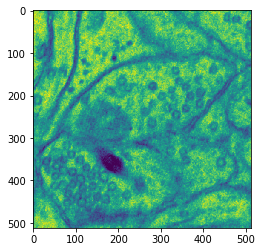

In [106]:
x= pytiff.Tiff("kharris15_apical_em_x4096-4608_y4608-5120_z093.tif") 
plt.imshow(x[:,:])